# K-means Clustering

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

Centroid based models - each cluster is represented by a single mean vector (e.g., k-means)

Connectivity based models - built based on distance connectivity (e.g., hierarchical clustering)

Distribution based models - built using statistical distributions (e.g., Gaussian mixtures)

Density based models - clusters are defined as dense areas (e.g., DBSCAN)

Steps for KMeans Clustering

Step 1: initialization - pick k random points as cluster centers, called centroids

Step 2: cluster assignment - assign each data point to its nearest centroid based on its distance to each centroid, and that forms k clusters

Step 3: centroid updating - for each new cluster, calculate its centroid by taking the average of all the points assigned to the cluster

Step 4: repeat steps 2 and 3 until none of cluster assignments change, or it reaches the maximum number of iterations

In [2]:
#For distance we use euclidean distance
x1 = np.array([0, 1])
x2 = np.array([2, 0])
print(np.sqrt(((x1-x2)**2).sum()))

2.23606797749979


In [3]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
df.iloc[:,:3].describe()

,Alcohol,Malic_Acid,Ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


# Plotting Data

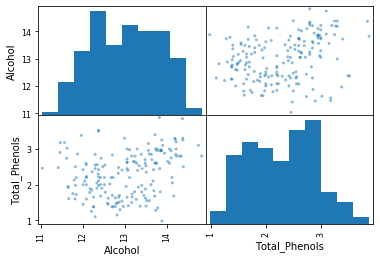

In [9]:
scatter_matrix(df.iloc[:,[0,5]])
plt.show()

# Scaling

In [11]:
X = df[['Alcohol', 'Total_Phenols']]

In [13]:
scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [14]:
scale.mean_

array([13.00061798,  2.29511236])

In [15]:
scale.scale_

array([0.80954291, 0.62409056])

In [16]:
X_scaled = scale.transform(X)

# Modelling

In [22]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 0 2 0 2 1 0 1 0
 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [23]:
kmeans.cluster_centers_

array([[ 0.92017418,  0.87087204],
       [ 0.05253603, -1.14020926],
       [-1.06183503,  0.08414606]])

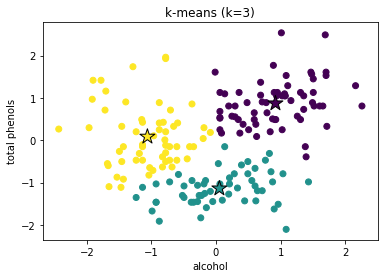

In [29]:
# plot the scaled data
plt.scatter(X_scaled[:,0], 
            X_scaled[:,1],
            c= pred)
# identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], 
            marker="*",
            s = 250, 
            c = [0,1,2], 
            edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()

In [30]:
X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

[[-0.00076337  0.32829793]]


In [31]:
kmeans.predict(X_new_scaled)

array([0])

# Choosing K

In [32]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
kmeans.inertia_

185.25081541190127

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
kmeans.inertia_

114.37290289645735

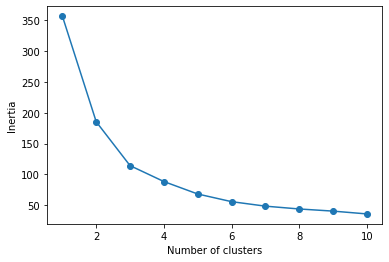

In [34]:
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# plot
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

k=3 seems to be optimal, as we increase the number of clusters from 3 to 4, the decrease in inertia slows down significantly, compared to that from 2 to 3. This approach is called elbow method (can you see why?). It is a useful graphical tool to estimate the optimal k in k-means.

# Modelling with more features

In [36]:
X = df
scale = StandardScaler() 
scale.fit(X)
X_scaled = scale.transform(X)

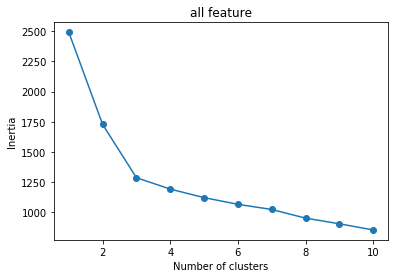

In [37]:
inertia = [] 
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i 
        )
    km.fit(X_scaled) 
    inertia.append(km.inertia_)
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("all feature")
plt.show()

In [38]:
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
